<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/plant_disease_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from PIL import Image

In [2]:
LBL = "label"
IMG = "image_path"
DGR = "degree"
SCL = "scale"
H_CLASS = "healthy"
S_CLASS = "sick"

In [ ]:
#load plants dataset
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5M  100 12.5M    0     0  4105k      0  0:00:03  0:00:03 --:--:-- 4106k


In [ ]:
#loat path dataset
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/paths.csv" -o paths.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  346k  100  346k    0     0   213k      0  0:00:01  0:00:01 --:--:--  213k


In [ ]:
#get dataframe
df = pd.read_csv("plants.csv")
df_path = pd.read_csv("paths.csv")

In [ ]:
%%capture

#mount drive
drive.mount('/content/drive')

In [ ]:
#get classes
classes = df.loc[:, LBL].unique().tolist()

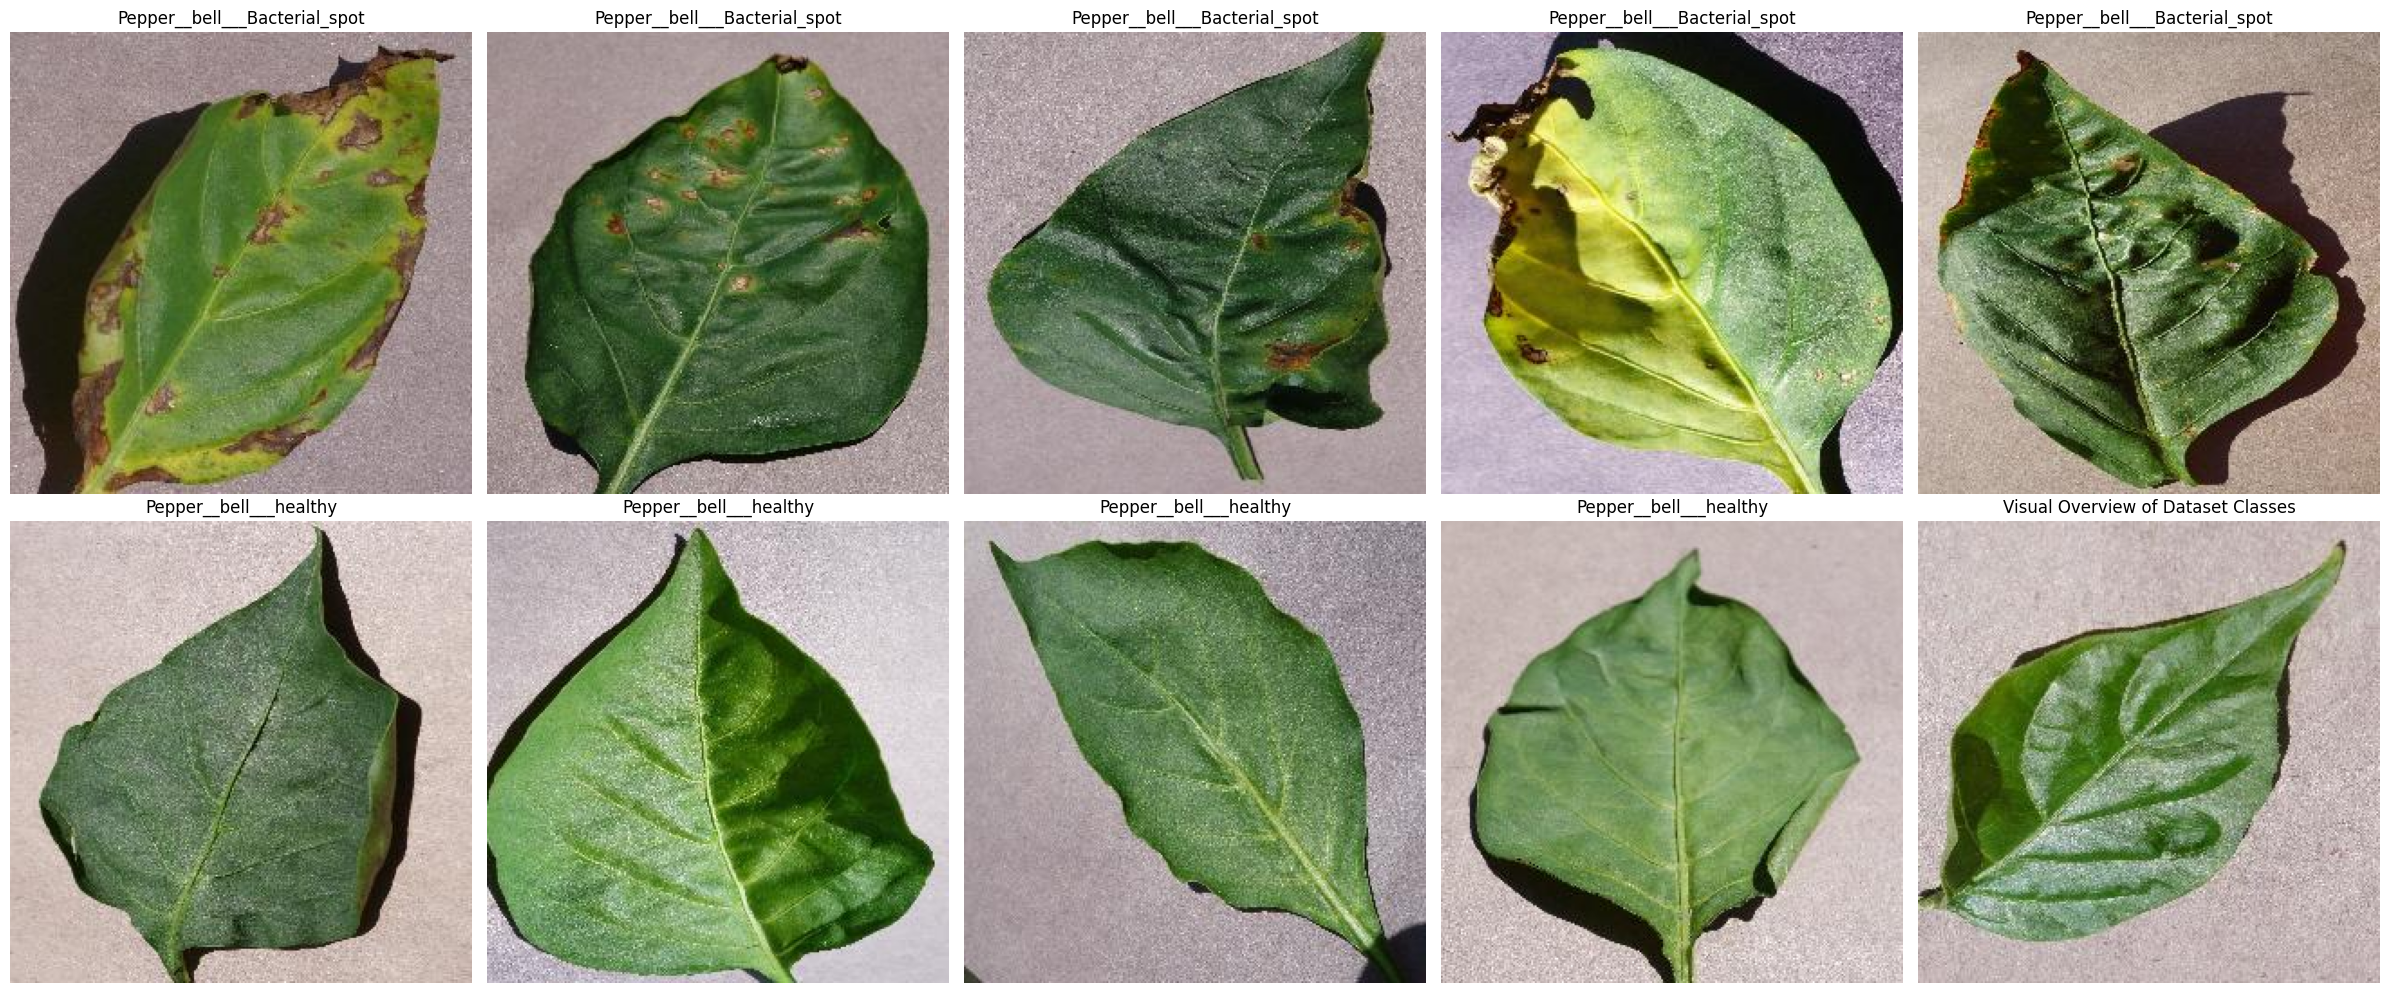

In [ ]:
#define variables
num_img = 5
num_rows = len(classes)

pic_num = 0
class_index = 0
h = 10

#plot random set of pictures, each row represents a class
fig, axes = plt.subplots(num_rows, num_img, figsize = (h*2.4,h))
fig.subplots_adjust(hspace=0.3)

for ax in axes.flat:
  if (pic_num + 1) / num_img > class_index + 1: class_index += 1 #update class index
  img_index = np.random.choice(df_path.loc[df_path[LBL] == classes[class_index]].index)

  img_path = df_path.loc[img_index, IMG]
  title = df_path.loc[img_index, LBL]
  degree = df_path.loc[img_index, DGR]
  scale = df_path.loc[img_index, SCL]

  img = Image.open(img_path).rotate(degree, expand= True)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"{title}, d: {degree}, s: {scale}")
  pic_num += 1

plt.tight_layout()
#plt.savefig("leaves.jpg", dpi=300)
plt.show()

In [ ]:
counts = df_path.loc[:, LBL].value_counts()

In [ ]:
counts

label
Pepper__bell___healthy           1477
Pepper__bell___Bacterial_spot     997
Name: count, dtype: int64

In [ ]:
size = df.shape[0]
heights = np.array([counts[label] for label in counts.index])
x_tags = [H_CLASS, S_CLASS]

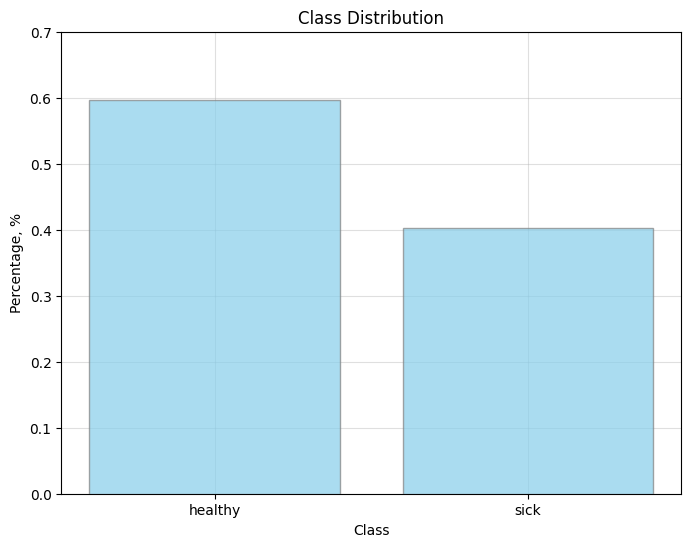

In [ ]:
fig = plt.figure(figsize = (8, 6))

plt.bar(x_tags, heights/size, color="skyblue", edgecolor = "grey", alpha = 0.7, zorder = 3)
plt.grid(alpha = 0.4, zorder = 1)
plt.ylim((0,0.7))
plt.ylabel("Percentage, %")
plt.xlabel("Class")
plt.title("Class Distribution")
plt.savefig("class_distribution.jpg", dpi = 300)
plt.show()

In [ ]:
is_rotated = df_path[DGR] != 0
is_scaled = df_path[SCL] != 1

num_rotated = df_path.loc[is_rotated].shape[0]
num_scaled = df_path.loc[is_scaled].shape[0]
num_rotated_scaled = df_path.loc[is_rotated & is_scaled].shape[0]

In [ ]:
print(f"Number of ratated pictures: {num_rotated}")
print(f"Number of scaled pictures: {num_scaled}")
print(f"Number of ratated and scaled pictures: {num_rotated_scaled}")